## Import Statements

In [ ]:
import pandas
import matplotlib.pyplot as plt

## Data Exploration

Read the .csv file and store it in a Pandas dataframe

In [ ]:
df = pandas.read_csv('QueryResults.csv', names=['DATE', 'TAG', 'POSTS'], header=0)

Examine the first 5 rows and the last 5 rows of the of the dataframe

In [ ]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,505
4,2008-08-01 00:00:00,c++,164


In [ ]:
df.tail()

,DATE,TAG,POSTS
2379,2022-11-01 00:00:00,php,3930
2380,2022-11-01 00:00:00,python,24918
2381,2022-11-01 00:00:00,r,4796
2382,2022-11-01 00:00:00,ruby,475
2383,2022-11-01 00:00:00,swift,1829


Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [ ]:
df.shape

(2384, 3)

Count the number of entries in each column of the dataframe

In [ ]:
df.count()

DATE     2384
TAG      2384
POSTS    2384
dtype: int64

Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [ ]:
df.groupby('TAG').sum()

,POSTS
TAG,
assembly,41665
c,389478
c#,1569899
c++,782589
delphi,50333
go,65983
java,1876071
javascript,2450181
perl,67307


How many months of data exist per language?


In [ ]:
df.groupby('TAG').count()

,DATE,POSTS
TAG,,
assembly,172,172
c,172,172
c#,173,173
c++,172,172
delphi,172,172
go,157,157
java,172,172
javascript,172,172
perl,172,172


## Data Cleaning

Change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [ ]:
type(df.DATE[1])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
print(df['DATE'][1])
type(pandas.to_datetime(df.DATE[1]))

2008-08-01 00:00:00


pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
df.DATE = pandas.to_datetime(df.DATE)
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,505
4,2008-08-01,c++,164


## Data Manipulation



In [ ]:
reshaped_df  = df.pivot(index='DATE', columns='TAG', values='POSTS')

In [ ]:
reshaped_df.shape

(173, 14)

In [ ]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [ ]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,505.0,164.0,14.0,NaN,222.0,163.0,28.0,158.0,120.0,NaN,70.0,NaN
2008-09-01,28.0,318.0,1645.0,753.0,104.0,NaN,1131.0,635.0,130.0,476.0,537.0,6.0,287.0,NaN
2008-10-01,15.0,303.0,1988.0,808.0,112.0,NaN,1149.0,724.0,127.0,612.0,508.0,NaN,247.0,NaN
2008-11-01,17.0,259.0,1731.0,734.0,141.0,NaN,957.0,581.0,97.0,501.0,451.0,1.0,158.0,NaN


In [ ]:
reshaped_df.tail()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2022-07-01,210.0,1492.0,5963.0,3264.0,127.0,745.0,6616.0,15178.0,130.0,3775.0,22474.0,4193.0,452.0,1754.0
2022-08-01,178.0,1509.0,6345.0,3247.0,133.0,859.0,6541.0,15612.0,119.0,3782.0,21976.0,4345.0,476.0,1744.0
2022-09-01,191.0,1660.0,5769.0,3107.0,148.0,845.0,6307.0,14384.0,82.0,3413.0,20322.0,4026.0,477.0,1814.0
2022-10-01,243.0,2019.0,5839.0,3240.0,153.0,743.0,6551.0,14189.0,82.0,3404.0,22244.0,4538.0,437.0,1647.0
2022-11-01,314.0,2388.0,6565.0,3682.0,121.0,828.0,7540.0,15587.0,120.0,3930.0,24918.0,4796.0,475.0,1829.0


Count the number of entries per programming language.

In [ ]:
reshaped_df.count()

TAG
assembly      172
c             172
c#            173
c++           172
delphi        172
go            157
java          172
javascript    172
perl          172
php           172
python        172
r             170
ruby          172
swift         164
dtype: int64

In [ ]:
reshaped_df.fillna(0, inplace=True)

In [ ]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,505.0,164.0,14.0,0.0,222.0,163.0,28.0,158.0,120.0,0.0,70.0,0.0
2008-09-01,28.0,318.0,1645.0,753.0,104.0,0.0,1131.0,635.0,130.0,476.0,537.0,6.0,287.0,0.0
2008-10-01,15.0,303.0,1988.0,808.0,112.0,0.0,1149.0,724.0,127.0,612.0,508.0,0.0,247.0,0.0
2008-11-01,17.0,259.0,1731.0,734.0,141.0,0.0,957.0,581.0,97.0,501.0,451.0,1.0,158.0,0.0


In [ ]:
reshaped_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


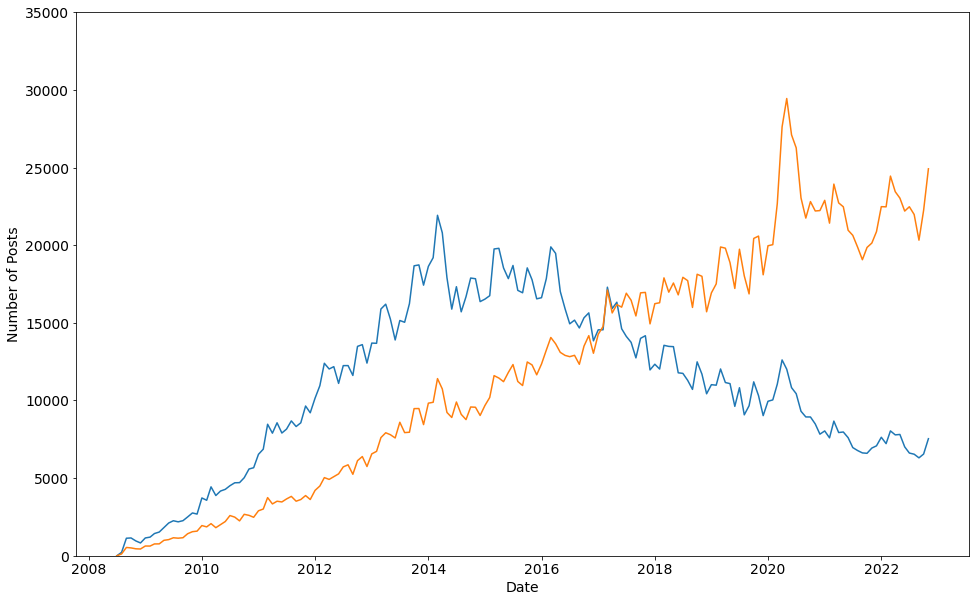

In [ ]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df.java)
plt.plot(reshaped_df.index, reshaped_df.python)

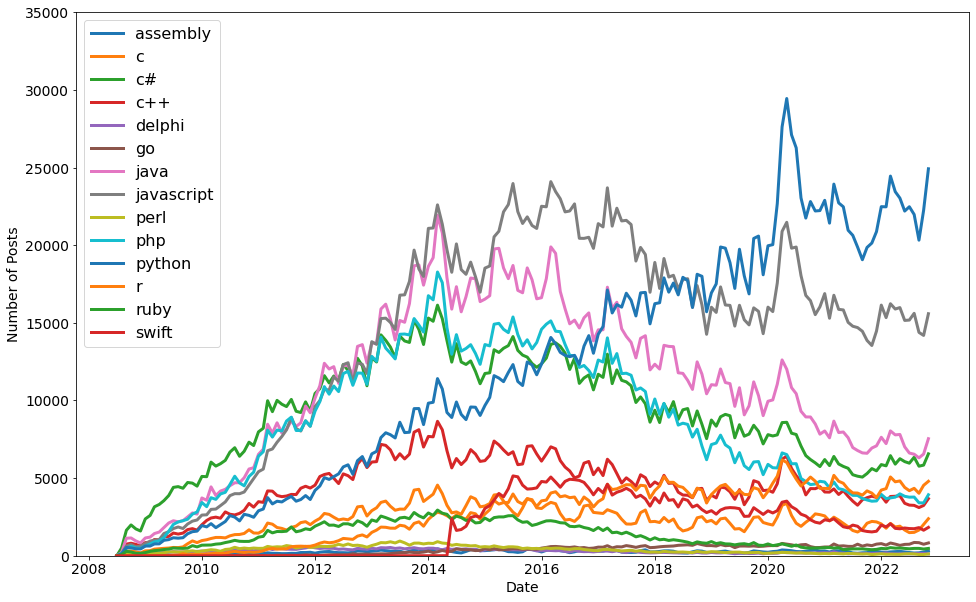

In [ ]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], linewidth=3, label=reshaped_df[column].name)
plt.legend(fontsize=16) 


**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, a specific number of observations (in this case 6). This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation.

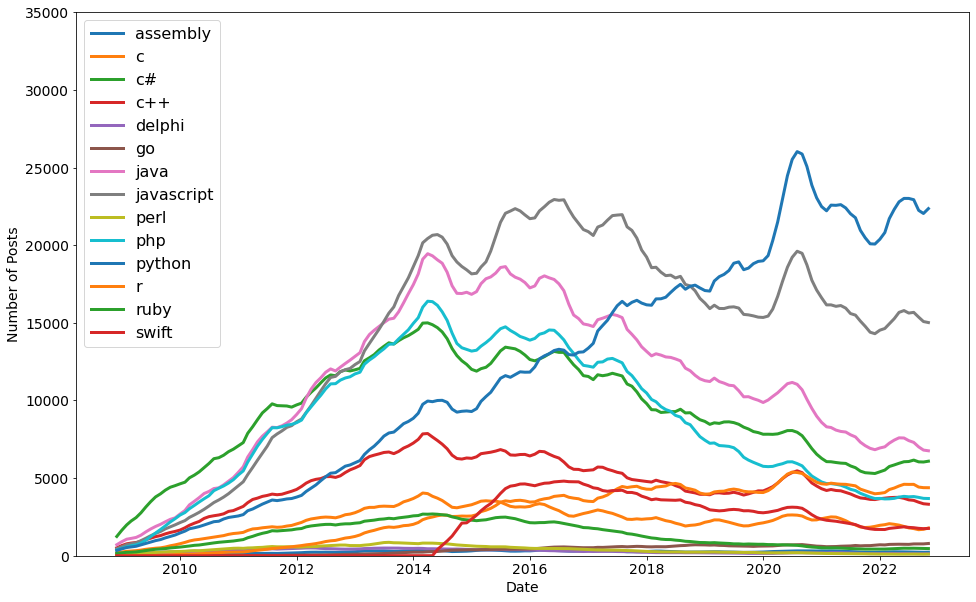

In [ ]:
roll_df = reshaped_df.rolling(window=6).mean()
 
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=roll_df[column].name)
 
plt.legend(fontsize=16)

#Conclusion
To conclude, the data shows that python is the most popular programming language. This is likely due to its relatively easy learning curve and simplified syntax which gives more emphasis on natural language. Additionally, python is a multi-purpose language which can be effectively utilised in many areas of computing such as Data Science, Cyber Security and Penetration Testing, web development and game development (to name a few). 

Javascript comes in at a clear second place. After becoming most popular language in the later half of 2013 by surpassing Java, it lost the top spot to python just before 2019.

###Final Note:
The query results used to formulate this conclusion are based on stack exchange data of posts relating to each programming language from the time of their launch to present day. Therefore the data does not represent the popularity of the languages directly but instead the frequency of occurance of querying by users. Thus, the results are likely implicated by a positive variable bias towards languages which are more complex due to the likely increased occurance of query per user of the language in question (and vice versa). In addition, the quality of documentation for each language would also likely impact the need for usage of platforms like stack exchange/overflow. Despite the omission of these variables, due to the characterists of python discussed and magnitude of relative querying, this potential bias would not likely affect the overall conclusion that python is the most popular programming language.

